In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from vanil_la.cg import ConjugateGradients, convergence_trace
from vanil_la.generate_data import generate_well_conditioned_spd

Condition number: 9.999999999999991
Is symmetric: True
Is positive definite: True


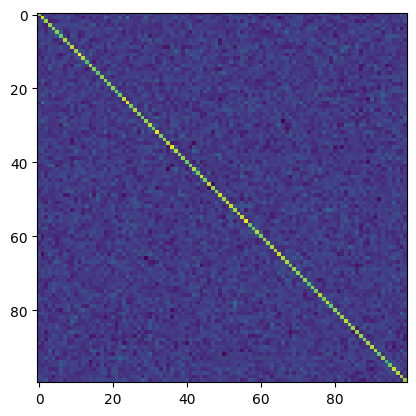

In [4]:
# Example usage:
n = 100
cond = 10
A = generate_well_conditioned_spd(n, condition_number=cond) # setting a mat with a ratio of 10 between the largest and smallest singular values
print(f"Condition number: {np.linalg.cond(A)}")
print(f"Is symmetric: {np.allclose(A, A.T)}")
print(f"Is positive definite: {np.all(np.linalg.eigvals(A) > 0)}")
plt.imshow(A)

In [5]:
# x_true is a cosine wave
x_vals = np.linspace(0, 1, n)
x_true = np.cos(20 * x_vals)

# b is the matrix-vector product of A and x_true
b = A @ x_true

# x_0 is a random vector
x0 = np.random.randn(n) * 0.01

In [7]:
solver = ConjugateGradients(A, b, x0, tol=1e-6, max_iter=100)

In [8]:
soln = solver.solve()

Text(0.5, 1.0, 'CG solution vs. true solution')

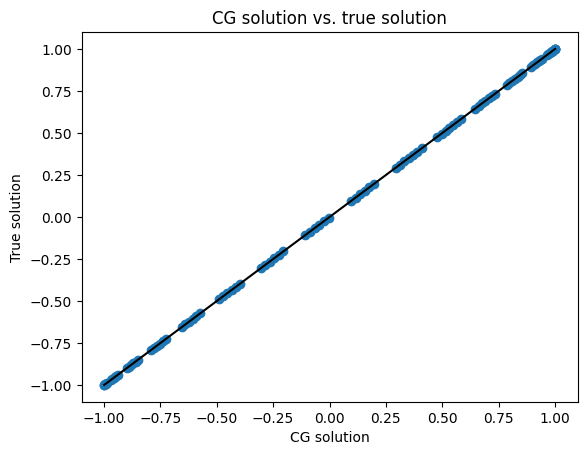

In [12]:
# diagonal line indicates perfect prediction
plt.plot(
    [np.min(x_true), np.max(x_true)], [np.min(x_true), np.max(x_true)], color="black"
)
plt.scatter(soln, x_true)
plt.xlabel("CG solution")
plt.ylabel("True solution")
plt.title("CG solution vs. true solution")

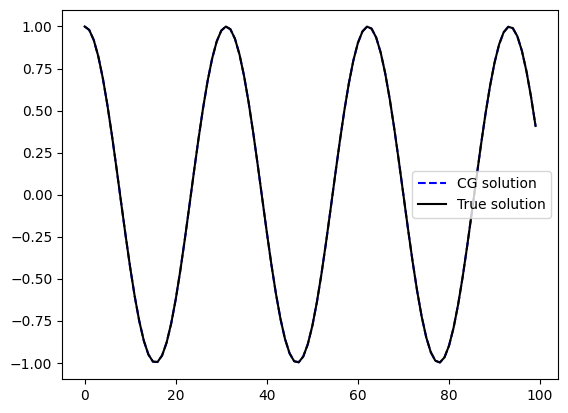

In [15]:
plt.plot(soln, label="CG solution", color="blue", linestyle="--")
plt.plot(x_true, label="True solution", color="black")
plt.legend()

In [16]:
soln_diff_norm = [(x - x_true).T @ A @ (x - x_true) for x in solver.solution_history]
# soln_diff_norm = [np.linalg.norm(x - x_true) for x in solver.solution_history]

residuals = [np.linalg.norm(A @ x - b) for x in solver.solution_history]

In [22]:
error_bounds = convergence_trace(np.linalg.cond(A), (x0 - x_true).T @ A @ (x0 - x_true), n+1)

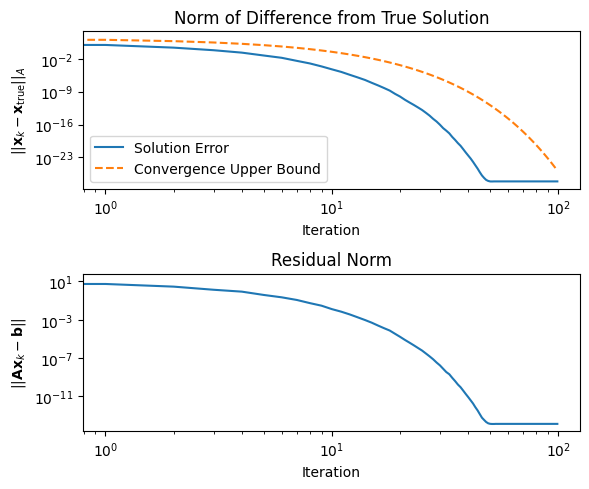

In [23]:
# plt.plot(res_history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5))

# Plot solution difference norm
ax1.plot(soln_diff_norm, label="Solution Error")
ax1.set_xlabel("Iteration")
ax1.set_ylabel(r"$||\mathbf{x}_k - \mathbf{x}_{\text{true}}||_{A}$")
ax1.plot(error_bounds[1:], "--", label="Convergence Upper Bound")
ax1.set_title("Norm of Difference from True Solution")
# logscale y
ax1.set_yscale("log")
# logscale x
ax1.set_xscale("log")
ax1.legend()

# Plot residuals
ax2.plot(residuals)
ax2.set_xlabel("Iteration")
ax2.set_ylabel(r"$||\mathbf{A}\mathbf{x}_k - \mathbf{b}||$")
ax2.set_title("Residual Norm")
# logscale y
ax2.set_yscale("log")
# logscale x
ax2.set_xscale("log")

plt.tight_layout()